In [2]:
import pandas as pd
import numpy as np
import os
os.chdir(r"D:\Jupyter CS 273A\Project\data")

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack,csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
train = pd.read_csv('train.csv').fillna(' ')
test = pd.read_csv('test.csv').fillna(' ')

train=train.sample(frac=0.25, replace=True)

train,val=train_test_split(train,test_size=0.25)


In [6]:
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [7]:
train_text = train['comment_text']
validation_text = val['comment_text']

test_text = test['comment_text']

all_text = pd.concat([train_text, test_text,validation_text])

In [8]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',\
                                  stop_words='english',ngram_range=(1,3),max_features=20000)
word_vectorizer.fit(all_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=True,
        token_pattern='\\w{1,}', tokenizer=None, use_idf=True,
        vocabulary=None)

In [9]:
train_features = word_vectorizer.transform(train_text)
test_features = word_vectorizer.transform(test_text)
val_features = word_vectorizer.transform(validation_text)

In [11]:
scores = []
test_pred = pd.DataFrame.from_dict({'id': test['id']})
train_pred= pd.DataFrame.from_dict({'id': train['id']})
val_pred= pd.DataFrame.from_dict({'id': val['id']})
aucsmean=[]
plt.figure(figsize=(10,5))

treen=[50,100,300,500,700,1000,1500,2000,2500]
#treen=[5,10]


for i in treen:
    aucs=[]
    for class_name in class_names:
        print(i)
        train_target = train[class_name]
        classifier = RandomForestClassifier(n_estimators=i, max_depth=10)

        classifier.fit(train_features, train_target)
        #train_pred[class_name]=classifier.predict_proba(train_features)[:, 1]
        val_pred[class_name]=classifier.predict_proba(val_features)[:, 1]
        #test_pred[class_name]=classifier.predict_proba(test_features)[:, 1]

        false_positive_rate, recall, thresholds = roc_curve(val[class_name],val_pred[class_name])
        roc_auc = auc(false_positive_rate, recall)
        #print(roc_auc)
        aucs.append(roc_auc)
    aucsmean.append(np.mean(aucs))

        #plt.plot(false_positive_rate, recall, label='AUC = %0.2f' %roc_auc)
    

50
50
50
50
50
50
100
100
100
100
100
100
300
300
300
300
300
300
500
500
500
500
500
500
700
700
700
700
700
700
1000
1000
1000
1000
1000
1000
1500
1500
1500
1500
1500
1500
2000
2000
2000
2000
2000
2000
2500
2500
2500
2500
2500
2500


<Figure size 720x360 with 0 Axes>

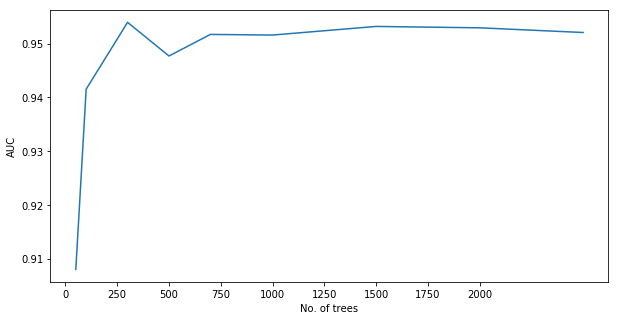

In [12]:
plt.figure(figsize=(10,5))
plt.plot(treen, aucsmean)
plt.xticks(np.arange(0, 2250, step=250))
plt.xlabel("No. of trees")
plt.ylabel("AUC")
#plt.legend(class_names,loc="lower right")
plt.show()


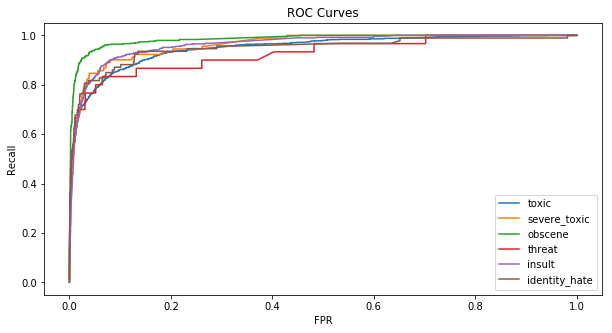

Validation AUC = 0.9555158378860286


In [10]:
scores = []
test_pred = pd.DataFrame.from_dict({'id': test['id']})
train_pred= pd.DataFrame.from_dict({'id': train['id']})
val_pred= pd.DataFrame.from_dict({'id': val['id']})
aucs=[]
plt.figure(figsize=(10,5))

for class_name in class_names:
    #print("Training class: "+class_name)
    train_target = train[class_name]
    classifier = RandomForestClassifier(n_estimators=750, max_depth=10)
    
    classifier.fit(train_features, train_target)
    #train_pred[class_name]=classifier.predict_proba(train_features)[:, 1]
    val_pred[class_name]=classifier.predict_proba(val_features)[:, 1]
    #test_pred[class_name]=classifier.predict_proba(test_features)[:, 1]


    false_positive_rate, recall, thresholds = roc_curve(val[class_name],val_pred[class_name])
    roc_auc = auc(false_positive_rate, recall)
    #print(roc_auc)
    aucs.append(roc_auc)

    plt.plot(false_positive_rate, recall, label='AUC = %0.2f' %roc_auc)
    
plt.title("ROC Curves")
plt.xlabel("FPR")
plt.ylabel("Recall")
plt.legend(class_names,loc="lower right")
plt.show()

print("Validation AUC = "+str(np.mean(aucs)))

In [15]:
test_pred.to_csv('model_randomforest.csv', index=False)